###**File Structure**

In [8]:
%%bash
rm -r sample_data


rm: cannot remove 'sample_data': No such file or directory


CalledProcessError: ignored

In [203]:
%%bash
mkdir startingData
mkdir code
mkdir results
mkdir figures
ls


code
figures
README.md
results
startingData


mkdir: cannot create directory ‘startingData’: File exists
mkdir: cannot create directory ‘code’: File exists
mkdir: cannot create directory ‘results’: File exists
mkdir: cannot create directory ‘figures’: File exists


In [207]:
%%bash
cd /content
cat > README.md
This file gives details about the Framingham Heart Study.
Following contents are found in this repository
startingData - contains the information related to the dataset used for analysis
code - contains the information about the codes run for performing the analysis
results - contains results of the analysis performed
Figures - contain the figures produced from the analysis

In [206]:
%%bash
cd /content/startingData
cat > README.md
This file contains details about what is included in startingData

This file contains the information related to the dataset used for analysis.
The dataset was downloaded from 'https://drive.google.com/uc?export=download&id=1zFxWLexV3XWVf6ix7CHUrUIwvAcG0xX2')
 The information about the dataset can be found in file FHS_Teaching_Longitudinal_Data.pdf
Starting data used for analysis is saved as Frahmingham.csv 
Further analysis were done using this dataset

In [208]:
%%bash
cd /content/code
cat > README.md
This file contains details about what is included in code.

This file contains information about the scientific coding done on the Frahmingham Heart Study to interpret statistical significant result.
The information about the code for easy reproduction is given in 'Project_Framingham_Heart.ipynb' notebook

In [209]:
%%bash
cd /content/results
cat > README.md
This file contains details about what is included in results directory.

This file contains information about the results produced from coding done on the Frahmingham Heart Study dataset to interpret statistical significant result.
the reults directory contains 'OverallDataStats.csv', 'Statistics_data.csv',  'ProbabilityMatrix.csv' and 'ProbabilityMatrix1.csv' used to calculate the probability.

OverallDataStats.csv : Statistics of the entire dataset

Statistics_data.csv:  Statistics of the period 3 dataset

ProbabilityMatrix.csv: Probability matrix created to determine the relationship between Stroke and Hypertension

ProbabilityMatrix1.csv to determine the relationship between Stroke and High and Borderline Cholestrol


In [210]:
%%bash
cd /content/figures
cat > README.md
This file contains details about what is included in figures directory.

This file contains information about the figures produced from coding done on the Frahmingham Heart Study to interpret statistical significant result.
the reults directory contains 'Figure1.pdf',  'Figure2.pdf', 'Figure3.pdf', 'Figure4.pdf'and 'Figure5.pdf' generated from analysis. 

Figures 1: Status of Cholestrol level among Age-groups

Figure 2 : Status of Hypertension level among Age-groups

Figure 3 : Total Cholestrol level distribution among Male and Female population

Figure 4: Blood pressure and its correlation with Total Cholestrol


###**Importing Libraries**

In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import numpy as np
import scipy.stats as stats

In [212]:
df=pd.read_csv('https://drive.google.com/uc?export=download&id=1zFxWLexV3XWVf6ix7CHUrUIwvAcG0xX2')
df.to_csv('/content/startingData/Framingham.csv')
df

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11622,9998212,1,173.0,46,126.0,82.0,0,0.0,19.17,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
11623,9998212,1,153.0,52,143.0,89.0,0,0.0,25.74,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,0
11624,9999312,2,196.0,39,133.0,86.0,1,30.0,20.91,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,4201
11625,9999312,2,240.0,46,138.0,79.0,1,20.0,26.39,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,4201


###**Data Management**

The analysis for our project focuses on systolic blood pressure, diastolic blood pressure, total cholsterol, HDLC, LDLC, BMI, Diabetes, currently smoking and if yes then how much, previous history of stroke or hypertension or existing condition of hypertension and smoke. 

In [213]:
#Selecting columns desired or required for our analysis
columnsOfInterest= ['SEX', 'PERIOD', 'AGE', 'SYSBP', 'DIABP', 'BPMEDS', 'CURSMOKE', 'CIGPDAY', 'TOTCHOL', 'HDLC', 'LDLC', 'BMI', 'DIABETES', 'PREVSTRK', 'PREVHYP','STROKE', 'HYPERTEN','TIMESTRK', 'TIMEHYP' ]
df1=df[columnsOfInterest]
df1

,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,DIABETES,PREVSTRK,PREVHYP,STROKE,HYPERTEN,TIMESTRK,TIMEHYP
0,1,1,39,106.0,70.0,0.0,0,0.0,195.0,NaN,NaN,26.97,0,0,0,0,0,8766,8766
1,1,3,52,121.0,66.0,0.0,0,0.0,209.0,31.0,178.0,NaN,0,0,0,0,0,8766,8766
2,2,1,46,121.0,81.0,0.0,0,0.0,250.0,NaN,NaN,28.73,0,0,0,0,0,8766,8766
3,2,2,52,105.0,69.5,0.0,0,0.0,260.0,NaN,NaN,29.43,0,0,0,0,0,8766,8766
4,2,3,58,108.0,66.0,0.0,0,0.0,237.0,54.0,141.0,28.50,0,0,0,0,0,8766,8766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11622,1,2,46,126.0,82.0,0.0,0,0.0,173.0,NaN,NaN,19.17,0,0,1,0,1,8766,0
11623,1,3,52,143.0,89.0,0.0,0,0.0,153.0,30.0,123.0,25.74,0,0,1,0,1,8766,0
11624,2,1,39,133.0,86.0,0.0,1,30.0,196.0,NaN,NaN,20.91,0,0,0,0,1,8766,4201
11625,2,2,46,138.0,79.0,0.0,1,20.0,240.0,NaN,NaN,26.39,0,0,0,0,1,8766,4201


In [214]:
# Checking for Outliers by boxplot method. AGE is the only column which can determine the outliers as the value of the other columns are necessary for our further calculations


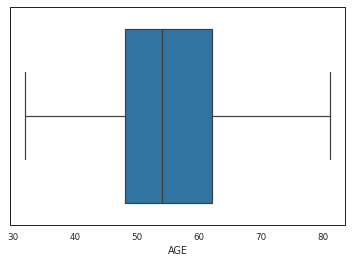

In [215]:
sns.boxplot(data=df1, x='AGE')

In [216]:
df1['AGE'].median()

54.0

In [217]:
# Calculate the 25th percentile.
qOne = df1['AGE'].quantile(0.25)

# Calculate the 75th percentile.
qThree = df1['AGE'].quantile(0.75)

print(qOne)
print(qThree)

48.0
62.0


In [218]:
#Calculating Inter-quartile range
iqr = stats.iqr(df1['AGE'])
iqr

14.0

In [219]:
#Calculating maximum
maximum = qThree + (1.5 * iqr)
maximum

83.0

In [220]:
#Calculating minimum
minimum = qOne - (1.5 * iqr)
minimum

27.0

In [221]:
#Identifying outliers
iqrOutliers = df1['AGE'].loc[(df1['AGE'] < minimum) | (df1['AGE'] > maximum)]
iqrOutliers

Series([], Name: AGE, dtype: int64)

In [222]:
#Dropping Outliers
df1['AGE'].drop(iqrOutliers.index)

0        39
1        52
2        46
3        52
4        58
         ..
11622    46
11623    52
11624    39
11625    46
11626    50
Name: AGE, Length: 11627, dtype: int64

In [223]:
#It was found that there were no outliers present in the AGE group. 

In [224]:
# Selecting the columns which contribute to determine the population statistics
OverallDataStatsColumn= ['AGE', 'SYSBP','DIABP', 'CIGPDAY', 'TOTCHOL', 'HDLC', 'LDLC', 'BMI']
OverallDataStats=df1[OverallDataStatsColumn]

In [225]:
OverallData = OverallDataStats.describe()
OverallData.to_csv('/content/results/OverallDataStats.csv')

In [226]:
#Segregating the population into different age groups
# Creating an additional column in dataframe
df1['AGE_GROUPS'] = 'Not given'

<ipython-input-226-e653db048130>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['AGE_GROUPS'] = 'Not given'


In [227]:
# Classifying population into the different age group 
df1.loc[(df1['AGE'] >= 31) & (df1['AGE'] <= 40), 'AGE_GROUPS'] = "31-40"
df1.loc[(df1['AGE'] >= 41) & (df1['AGE'] <= 50), 'AGE_GROUPS'] = "41-50"
df1.loc[(df1['AGE'] >= 51) & (df1['AGE'] <= 60), 'AGE_GROUPS'] = "51-60"
df1.loc[(df1['AGE'] >= 61) & (df1['AGE'] <= 70), 'AGE_GROUPS'] = "61-70"
df1.loc[(df1['AGE'] >= 71) & (df1['AGE'] <= 80), 'AGE_GROUPS'] = "71-80"
df1.loc[(df1['AGE'] >= 81) & (df1['AGE'] <= 90), 'AGE_GROUPS'] = "81-90"

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [228]:
# Checking the dataframe for NaN values
df1.isnull().sum()

SEX              0
PERIOD           0
AGE              0
SYSBP            0
DIABP            0
BPMEDS         593
CURSMOKE         0
CIGPDAY         79
TOTCHOL        409
HDLC          8600
LDLC          8601
BMI             52
DIABETES         0
PREVSTRK         0
PREVHYP          0
STROKE           0
HYPERTEN         0
TIMESTRK         0
TIMEHYP          0
AGE_GROUPS       0
dtype: int64

In [ ]:
# Dropping NaN values for the below columns
df2 = df1.dropna(subset=['HDLC', 'LDLC','BMI','TOTCHOL', 'CIGPDAY'])
df2

<font color = 'Red'>As the HDLC and LDLC levels were collected during period 3 of the study. Using the data only for period 3 </font>

In [230]:
# As the HDLC and LDLC levels were calculated during period 3. Using the data only for period 3
df4=df2.loc[df1['PERIOD'] == 3]
df4

,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,DIABETES,PREVSTRK,PREVHYP,STROKE,HYPERTEN,TIMESTRK,TIMEHYP,AGE_GROUPS
4,2,3,58,108.0,66.0,0.0,0,0.0,237.0,54.0,141.0,28.50,0,0,0,0,0,8766,8766,51-60
14,2,3,55,180.0,106.0,1.0,0,0.0,220.0,46.0,135.0,31.17,1,0,1,0,1,8766,0,51-60
19,2,3,57,110.0,46.0,0.0,1,30.0,320.0,34.0,286.0,22.02,0,0,0,0,1,8766,8679,51-60
22,1,3,64,168.0,100.0,0.0,0,0.0,280.0,44.0,236.0,25.72,0,0,1,0,1,8766,0,61-70
25,1,3,55,173.0,123.0,1.0,0,0.0,211.0,48.0,163.0,29.11,0,0,1,0,1,8766,0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11603,2,3,68,110.0,66.0,0.0,0,0.0,243.0,65.0,178.0,24.30,0,0,1,0,1,8766,0,61-70
11606,1,3,70,163.5,75.0,0.0,0,0.0,219.0,50.0,169.0,25.26,0,0,1,1,1,8346,0,61-70
11615,2,3,60,205.0,100.0,0.0,1,20.0,228.0,47.0,181.0,22.37,0,0,1,0,1,6433,2219,51-60
11618,2,3,56,145.0,92.0,1.0,1,35.0,251.0,70.0,181.0,21.97,0,0,1,0,1,6729,4396,51-60


<font color = 'red'>Creating dataset to know about the statistics of the data for Period 3 </font>


In [231]:
columnsForStatistics= ['AGE', 'SYSBP','DIABP', 'CIGPDAY', 'TOTCHOL', 'HDLC', 'LDLC', 'BMI']
df3=df2[columnsForStatistics]


In [232]:
Statistics_Data=df3.describe()
Statistics_Data.to_csv('/content/results/Statistics_data.csv')

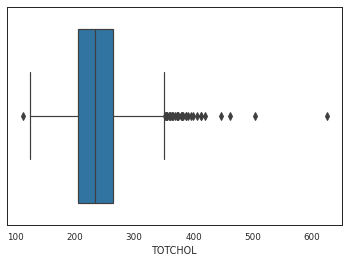

In [233]:
# Checking for outliers
sns.boxplot(data=df4, x='TOTCHOL')

In [234]:
df4['TOTCHOL'].median()

234.0

In [235]:
# Calculate the 25th percentile.
q1 = df4['TOTCHOL'].quantile(0.25)

# Calculate the 75th percentile.
q3 = df1['TOTCHOL'].quantile(0.75)

print(q1)
print(q3)

206.0
268.0


In [236]:
# Calculating interquartile range
iqr1 = stats.iqr(df4['TOTCHOL'])
iqr1

58.0

In [237]:
# Calculating maximum
maximum1 = q3 + (1.5 * iqr1)
maximum1

355.0

In [238]:
# Calculating minimum
minimum1 = q1 - (1.5 * iqr1)
minimum1

119.0

In [239]:
#Identifying outliers
iqrOutliers1 = df4['TOTCHOL'].loc[(df4['TOTCHOL'] < minimum) | (df4['TOTCHOL'] > maximum)]
iqrOutliers1

4        237.0
14       220.0
19       320.0
22       280.0
25       211.0
         ...  
11603    243.0
11606    219.0
11615    228.0
11618    251.0
11623    153.0
Name: TOTCHOL, Length: 3001, dtype: float64

In [240]:
#Drop outliers
df4['TOTCHOL'].drop(iqrOutliers1.index)

Series([], Name: TOTCHOL, dtype: float64)

In [241]:
# There were no outliers present for TOTCHOL in the data. TOTCHOL and HDLC, LDLC are required and important variables for our analysis so removing the outliers will interfere with our results.

In [242]:
# Replacing NaN values in the rest of the with column with not given
df5= df4.fillna("Not given")
df5

,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,DIABETES,PREVSTRK,PREVHYP,STROKE,HYPERTEN,TIMESTRK,TIMEHYP,AGE_GROUPS
4,2,3,58,108.0,66.0,0.0,0,0.0,237.0,54.0,141.0,28.50,0,0,0,0,0,8766,8766,51-60
14,2,3,55,180.0,106.0,1.0,0,0.0,220.0,46.0,135.0,31.17,1,0,1,0,1,8766,0,51-60
19,2,3,57,110.0,46.0,0.0,1,30.0,320.0,34.0,286.0,22.02,0,0,0,0,1,8766,8679,51-60
22,1,3,64,168.0,100.0,0.0,0,0.0,280.0,44.0,236.0,25.72,0,0,1,0,1,8766,0,61-70
25,1,3,55,173.0,123.0,1.0,0,0.0,211.0,48.0,163.0,29.11,0,0,1,0,1,8766,0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11603,2,3,68,110.0,66.0,0.0,0,0.0,243.0,65.0,178.0,24.30,0,0,1,0,1,8766,0,61-70
11606,1,3,70,163.5,75.0,0.0,0,0.0,219.0,50.0,169.0,25.26,0,0,1,1,1,8346,0,61-70
11615,2,3,60,205.0,100.0,0.0,1,20.0,228.0,47.0,181.0,22.37,0,0,1,0,1,6433,2219,51-60
11618,2,3,56,145.0,92.0,1.0,1,35.0,251.0,70.0,181.0,21.97,0,0,1,0,1,6729,4396,51-60


In [243]:
#Total cholesterol is a measurement of both good and bad cholesterol

#Total cholesterol in adults:

#Normal: less than 200 mg/dL

#Borderline high: 200 to 239 mg/dL

#High: at or above 240 mg/dL

In [244]:
# Creating new column Status_Totchol to differentiate the population based on their total cholesterol level
df5.loc[(df5['TOTCHOL'] < 200), 'STATUS_TOTCHOL'] = "Normal"
df5.loc[(df5['TOTCHOL'] >= 200) & (df5['TOTCHOL'] <= 239), 'STATUS_TOTCHOL'] = "Borderline High"
df5.loc[(df5['TOTCHOL'] >= 240) , 'STATUS_TOTCHOL'] = "High"

In [245]:
# For male and female population the average total cholestrol and HDL levels differs. The one parameter for accurate calculation is Cholestrol_Ratio
# For women the ideal HDL level is 50 mg/dL (Total Cholestrol to HDL ratio = 4) and for men its 40mg/dL (Total Cholestrol to HDL ratio = 5)
# In general the  ideal cholestrol ratio is considered to be 3.5

In [246]:
# Creating new column CHOLESTEROL_RATIO to calculate ratio of totalcholesterol and HDLC
df5['CHOLESTROL_RATIO'] = df5['TOTCHOL'] / df5['HDLC']
df5

,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,...,DIABETES,PREVSTRK,PREVHYP,STROKE,HYPERTEN,TIMESTRK,TIMEHYP,AGE_GROUPS,STATUS_TOTCHOL,CHOLESTROL_RATIO
4,2,3,58,108.0,66.0,0.0,0,0.0,237.0,54.0,...,0,0,0,0,0,8766,8766,51-60,Borderline High,4.388889
14,2,3,55,180.0,106.0,1.0,0,0.0,220.0,46.0,...,1,0,1,0,1,8766,0,51-60,Borderline High,4.782609
19,2,3,57,110.0,46.0,0.0,1,30.0,320.0,34.0,...,0,0,0,0,1,8766,8679,51-60,High,9.411765
22,1,3,64,168.0,100.0,0.0,0,0.0,280.0,44.0,...,0,0,1,0,1,8766,0,61-70,High,6.363636
25,1,3,55,173.0,123.0,1.0,0,0.0,211.0,48.0,...,0,0,1,0,1,8766,0,51-60,Borderline High,4.395833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11603,2,3,68,110.0,66.0,0.0,0,0.0,243.0,65.0,...,0,0,1,0,1,8766,0,61-70,High,3.738462
11606,1,3,70,163.5,75.0,0.0,0,0.0,219.0,50.0,...,0,0,1,1,1,8346,0,61-70,Borderline High,4.380000
11615,2,3,60,205.0,100.0,0.0,1,20.0,228.0,47.0,...,0,0,1,0,1,6433,2219,51-60,Borderline High,4.851064
11618,2,3,56,145.0,92.0,1.0,1,35.0,251.0,70.0,...,0,0,1,0,1,6729,4396,51-60,High,3.585714


In [247]:
# Creating new column STATUS_HYPERTEN to categorize population based on their systolic and diastolic blood pressure
df5.loc[(df5['SYSBP'] < 120) | (df5['DIABP'] < 80 ), 'STATUS_HYPERTEN'] = "Normal"
df5.loc[((df5['SYSBP'] >= 120) & (df5['SYSBP'] <= 139)) | ((df5['DIABP'] >= 80 ) & (df5['DIABP'] <= 89)), 'STATUS_HYPERTEN'] = "At risk"
df5.loc[(df5['SYSBP'] >= 140) | (df5['DIABP'] > 90 ), 'STATUS_HYPERTEN'] = "Hypertension"

<font color = 'yellow'>Calculating sex wise characteristics </font>

In [248]:
# Calculating statistics of the female population having normal total cholesterol levels
FemaleHavingNormal= df5.loc[(df5['STATUS_TOTCHOL'] == 'Normal')& (df5['SEX']==2)]
FemaleHavingNormal

,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,...,PREVSTRK,PREVHYP,STROKE,HYPERTEN,TIMESTRK,TIMEHYP,AGE_GROUPS,STATUS_TOTCHOL,CHOLESTROL_RATIO,STATUS_HYPERTEN
34,2,3,53,124.0,78.0,0.0,0,0.0,159.0,53.0,...,0,1,0,1,5592,0,51-60,Normal,3.000000,At risk
157,2,3,52,195.0,107.0,1.0,1,40.0,180.0,60.0,...,0,1,0,1,8766,742,51-60,Normal,3.000000,Hypertension
176,2,3,74,206.0,106.0,Not given,0,0.0,194.0,59.0,...,0,1,0,1,8406,0,71-80,Normal,3.288136,Hypertension
209,2,3,58,150.0,82.0,0.0,0,0.0,198.0,56.0,...,0,1,0,1,8766,0,51-60,Normal,3.535714,Hypertension
272,2,3,59,172.0,97.0,0.0,1,30.0,192.0,48.0,...,0,1,0,1,6036,2897,51-60,Normal,4.000000,Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11391,2,3,68,140.0,74.0,Not given,0,0.0,194.0,43.0,...,0,1,1,1,5039,0,61-70,Normal,4.511628,Hypertension
11461,2,3,53,114.0,80.0,Not given,0,0.0,181.0,89.0,...,0,0,0,0,8766,8766,51-60,Normal,2.033708,At risk
11469,2,3,66,148.0,82.0,1.0,0,0.0,189.0,52.0,...,0,1,0,1,8766,707,61-70,Normal,3.634615,Hypertension
11508,2,3,52,152.0,86.0,0.0,1,6.0,195.0,34.0,...,0,1,0,1,8766,3663,51-60,Normal,5.735294,Hypertension


In [249]:
# Calculating statistics of the female population having normal total cholesterol levels
FemaleHavingNormal.describe()

,SEX,PERIOD,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,DIABETES,PREVSTRK,PREVHYP,STROKE,HYPERTEN,TIMESTRK,TIMEHYP,CHOLESTROL_RATIO
count,251.0,251.0,251.000000,251.000000,251.000000,251.000000,251.000000,251.00000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,2.0,3.0,58.776892,136.221116,79.886454,0.370518,6.011952,182.47012,49.581673,124.494024,24.933307,0.059761,0.015936,0.505976,0.087649,0.641434,8174.322709,4523.043825,3.983285
std,0.0,0.0,8.853814,24.740936,11.481640,0.483908,10.525201,14.72556,14.238971,23.920430,4.848531,0.237517,0.125479,0.500963,0.283349,0.480538,1424.254585,3722.784630,1.211986
min,2.0,3.0,46.000000,86.000000,56.000000,0.000000,0.000000,112.00000,19.000000,45.000000,14.530000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.779221
25%,2.0,3.0,51.000000,119.000000,71.000000,0.000000,0.000000,174.50000,40.000000,110.000000,21.835000,0.000000,0.000000,0.000000,0.000000,0.000000,8766.000000,0.000000,3.214986
50%,2.0,3.0,56.000000,132.000000,80.000000,0.000000,0.000000,187.00000,48.000000,127.000000,23.960000,0.000000,0.000000,1.000000,0.000000,1.000000,8766.000000,4326.000000,3.812500
75%,2.0,3.0,66.000000,150.500000,86.000000,1.000000,10.000000,194.00000,57.000000,143.000000,26.875000,0.000000,0.000000,1.000000,0.000000,1.000000,8766.000000,8766.000000,4.578397
max,2.0,3.0,80.000000,220.500000,130.000000,1.000000,60.000000,199.00000,95.000000,170.000000,56.800000,1.000000,1.000000,1.000000,1.000000,1.000000,8766.000000,8766.000000,9.789474


In [250]:
# Calculating statistics of the male population having normal total cholesterol levels
maleHavingNormal= df5.loc[(df5['STATUS_TOTCHOL'] == 'Normal')& (df5['SEX']==1)]
maleHavingNormal

,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,...,PREVSTRK,PREVHYP,STROKE,HYPERTEN,TIMESTRK,TIMEHYP,AGE_GROUPS,STATUS_TOTCHOL,CHOLESTROL_RATIO,STATUS_HYPERTEN
48,1,3,53,152.5,101.0,0.0,0,0.0,162.0,31.0,...,0,1,0,1,8766,1469,51-60,Normal,5.225806,Hypertension
91,1,3,65,180.0,82.0,Not given,1,20.0,199.0,94.0,...,0,1,0,1,5839,0,61-70,Normal,2.117021,Hypertension
117,1,3,66,139.0,72.0,0.0,0,0.0,176.0,26.0,...,0,1,0,1,8766,727,61-70,Normal,6.769231,At risk
243,1,3,66,144.0,81.0,0.0,1,10.0,196.0,35.0,...,0,1,0,1,5496,3045,61-70,Normal,5.600000,Hypertension
297,1,3,61,128.0,72.0,0.0,1,20.0,173.0,42.0,...,0,0,0,1,8766,5115,61-70,Normal,4.119048,At risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11526,1,3,74,112.0,67.0,0.0,0,0.0,184.0,54.0,...,0,0,0,0,8766,8766,71-80,Normal,3.407407,Normal
11551,1,3,62,131.0,80.0,0.0,0,0.0,185.0,57.0,...,0,0,0,0,8766,8766,61-70,Normal,3.245614,At risk
11573,1,3,60,143.0,92.0,0.0,0,0.0,193.0,45.0,...,0,1,0,1,8766,2856,51-60,Normal,4.288889,Hypertension
11589,1,3,55,132.0,81.0,0.0,0,0.0,189.0,48.0,...,0,1,1,1,6579,1445,51-60,Normal,3.937500,At risk


In [251]:
# Calculating statistics of the female population having normal total cholesterol levels
maleHavingNormal.describe()

,SEX,PERIOD,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,DIABETES,PREVSTRK,PREVHYP,STROKE,HYPERTEN,TIMESTRK,TIMEHYP,CHOLESTROL_RATIO
count,346.0,346.0,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,1.0,3.0,60.994220,138.384393,81.478324,0.395954,8.554913,177.907514,41.598266,127.095376,25.785347,0.112717,0.017341,0.586705,0.095376,0.722543,7904.193642,3857.257225,4.671086
std,0.0,0.0,8.624533,21.637185,11.438631,0.489763,13.114817,15.536683,12.445960,24.175677,3.541106,0.316704,0.130728,0.493138,0.294159,0.448392,1400.374273,3483.566215,1.571238
min,1.0,3.0,45.000000,96.000000,51.000000,0.000000,0.000000,130.000000,11.000000,34.000000,14.430000,0.000000,0.000000,0.000000,0.000000,0.000000,2365.000000,0.000000,1.930693
25%,1.0,3.0,53.000000,122.250000,72.625000,0.000000,0.000000,167.250000,33.000000,110.250000,23.870000,0.000000,0.000000,0.000000,0.000000,0.000000,7092.000000,0.000000,3.606186
50%,1.0,3.0,60.000000,135.000000,80.000000,0.000000,0.000000,180.500000,40.000000,129.500000,25.870000,0.000000,0.000000,1.000000,0.000000,1.000000,8766.000000,2903.000000,4.340909
75%,1.0,3.0,68.000000,151.000000,90.000000,1.000000,20.000000,191.000000,48.000000,145.000000,27.810000,0.000000,0.000000,1.000000,0.000000,1.000000,8766.000000,7949.000000,5.386261
max,1.0,3.0,80.000000,225.000000,112.500000,1.000000,80.000000,199.000000,101.000000,178.000000,39.260000,1.000000,1.000000,1.000000,1.000000,1.000000,8766.000000,8766.000000,15.636364


In [252]:
# Calculating statistics of the male population having borderline high total cholesterol levels
maleHavingBorderlineHigh= df5.loc[(df5['STATUS_TOTCHOL'] == 'Borderline High')& (df5['SEX']==1)]
maleHavingBorderlineHigh.describe()

,SEX,PERIOD,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,DIABETES,PREVSTRK,PREVHYP,STROKE,HYPERTEN,TIMESTRK,TIMEHYP,CHOLESTROL_RATIO
count,500.0,500.0,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.0,3.0,60.402000,138.342000,82.359000,0.366000,8.47400,218.480000,43.276000,164.100000,26.290740,0.074000,0.024000,0.608000,0.098000,0.744000,7982.826000,3751.680000,5.534234
std,0.0,0.0,8.067625,20.790419,11.757342,0.482192,13.42676,11.522462,12.431771,24.081234,3.376811,0.262033,0.153202,0.488686,0.297612,0.436859,1467.097658,3468.439171,1.936934
min,1.0,3.0,45.000000,95.000000,30.000000,0.000000,0.00000,200.000000,12.000000,71.000000,17.630000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.425287
25%,1.0,3.0,53.000000,122.000000,75.000000,0.000000,0.00000,208.000000,35.000000,150.000000,24.057500,0.000000,0.000000,0.000000,0.000000,0.000000,7668.750000,0.000000,4.274510
50%,1.0,3.0,60.000000,135.500000,80.750000,0.000000,0.00000,218.000000,42.000000,165.500000,25.980000,0.000000,0.000000,1.000000,0.000000,1.000000,8766.000000,2921.000000,5.141196
75%,1.0,3.0,66.250000,150.625000,90.000000,1.000000,20.00000,228.000000,50.000000,181.000000,28.560000,0.000000,0.000000,1.000000,0.000000,1.000000,8766.000000,7336.500000,6.303662
max,1.0,3.0,80.000000,209.000000,123.000000,1.000000,80.00000,239.000000,87.000000,219.000000,45.430000,1.000000,1.000000,1.000000,1.000000,1.000000,8766.000000,8766.000000,17.416667


In [253]:
# Calculating statistics of the male population having borderline high total cholesterol levels
FemaleHavingBorderline= df5.loc[(df5['STATUS_TOTCHOL'] == 'Borderline High')& (df5['SEX']==2)]
FemaleHavingBorderline.describe()

,SEX,PERIOD,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,DIABETES,PREVSTRK,PREVHYP,STROKE,HYPERTEN,TIMESTRK,TIMEHYP,CHOLESTROL_RATIO
count,554.0,554.0,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,2.0,3.0,59.931408,138.880866,80.803249,0.326715,5.944043,220.837545,52.888087,158.299639,25.636011,0.081227,0.007220,0.548736,0.072202,0.754513,8313.371841,4219.220217,4.489892
std,0.0,0.0,8.535152,23.189121,10.698190,0.469436,10.305748,11.234423,14.214137,24.506790,4.485877,0.273431,0.084741,0.498069,0.259056,0.430765,1144.269952,3442.633594,1.287297
min,2.0,3.0,45.000000,94.000000,49.000000,0.000000,0.000000,200.000000,22.000000,20.000000,16.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.939130
25%,2.0,3.0,53.000000,122.000000,74.000000,0.000000,0.000000,212.000000,43.000000,142.000000,22.495000,0.000000,0.000000,0.000000,0.000000,1.000000,8766.000000,732.750000,3.606331
50%,2.0,3.0,58.000000,135.000000,80.000000,0.000000,0.000000,221.000000,52.000000,161.000000,24.745000,0.000000,0.000000,1.000000,0.000000,1.000000,8766.000000,3652.000000,4.262075
75%,2.0,3.0,67.000000,152.000000,88.000000,1.000000,10.000000,230.000000,61.000000,176.000000,27.845000,0.000000,0.000000,1.000000,0.000000,1.000000,8766.000000,8179.000000,5.108333
max,2.0,3.0,80.000000,217.500000,120.000000,1.000000,50.000000,239.000000,115.000000,214.000000,48.640000,1.000000,1.000000,1.000000,1.000000,1.000000,8766.000000,8766.000000,9.636364


In [254]:
# Calculating statistics of the female population having high total cholesterol levels
FemaleHavingHigh= df5.loc[(df5['STATUS_TOTCHOL'] == 'High')& (df5['SEX']==2)]
FemaleHavingHigh.describe()

,SEX,PERIOD,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,DIABETES,PREVSTRK,PREVHYP,STROKE,HYPERTEN,TIMESTRK,TIMEHYP,CHOLESTROL_RATIO
count,905.0,905.0,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,2.0,3.0,61.843094,142.628177,81.521547,0.280663,4.899448,277.424309,55.302762,210.625414,25.805105,0.064088,0.027624,0.633149,0.081768,0.788950,8216.961326,3582.948066,5.529774
std,0.0,0.0,7.915882,23.586363,11.279280,0.449572,9.451779,34.661560,17.098784,41.726618,4.145730,0.245046,0.163985,0.482212,0.274162,0.408279,1396.041477,3447.396770,2.139539
min,2.0,3.0,44.000000,86.000000,46.000000,0.000000,0.000000,240.000000,11.000000,65.000000,16.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.550265
25%,2.0,3.0,55.000000,125.000000,74.000000,0.000000,0.000000,253.000000,45.000000,183.000000,23.140000,0.000000,0.000000,0.000000,0.000000,1.000000,8766.000000,0.000000,4.196970
50%,2.0,3.0,61.000000,141.000000,80.000000,0.000000,0.000000,268.000000,53.000000,206.000000,25.110000,0.000000,0.000000,1.000000,0.000000,1.000000,8766.000000,2774.000000,5.100000
75%,2.0,3.0,68.000000,157.000000,89.000000,1.000000,4.000000,293.000000,64.000000,232.000000,27.940000,0.000000,0.000000,1.000000,0.000000,1.000000,8766.000000,7210.000000,6.294118
max,2.0,3.0,81.000000,254.000000,130.000000,1.000000,50.000000,625.000000,189.000000,565.000000,46.520000,1.000000,1.000000,1.000000,1.000000,1.000000,8766.000000,8766.000000,30.000000


In [255]:
# Calculating statistics of the female population having high total cholesterol levels
maleHavingHigh= df5.loc[(df5['STATUS_TOTCHOL'] == 'High')& (df5['SEX']==1)]
maleHavingHigh.describe()

,SEX,PERIOD,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,LDLC,BMI,DIABETES,PREVSTRK,PREVHYP,STROKE,HYPERTEN,TIMESTRK,TIMEHYP,CHOLESTROL_RATIO
count,445.0,445.0,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.00000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,1.0,3.0,59.633708,140.410112,83.662921,0.386517,8.373034,270.685393,45.984270,211.683146,26.389910,0.080899,0.01573,0.622472,0.085393,0.768539,8038.451685,3698.002247,6.510754
std,0.0,0.0,8.037258,20.497880,10.633529,0.487499,13.018185,27.366546,14.615715,38.979965,3.464018,0.272987,0.12457,0.485314,0.279781,0.422241,1353.944238,3354.967066,2.566154
min,1.0,3.0,46.000000,98.000000,53.000000,0.000000,0.000000,240.000000,10.000000,44.000000,17.280000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.123188
25%,1.0,3.0,53.000000,125.000000,77.000000,0.000000,0.000000,250.000000,37.000000,190.000000,24.040000,0.000000,0.00000,0.000000,0.000000,1.000000,7633.000000,0.000000,5.033333
50%,1.0,3.0,59.000000,137.000000,83.000000,0.000000,0.000000,265.000000,44.000000,210.000000,26.210000,0.000000,0.00000,1.000000,0.000000,1.000000,8766.000000,2947.000000,6.088889
75%,1.0,3.0,66.000000,154.000000,91.000000,1.000000,20.000000,283.000000,54.000000,231.000000,28.190000,0.000000,0.00000,1.000000,0.000000,1.000000,8766.000000,7167.000000,7.393939
max,1.0,3.0,80.000000,205.000000,122.000000,1.000000,60.000000,413.000000,138.000000,376.000000,36.800000,1.000000,1.00000,1.000000,1.000000,1.000000,8766.000000,8766.000000,33.600000


###**Data Visualization**

<font color = 'red'>Creating a bar plot to visualize the distribution of cholestrol among age-groups </font>

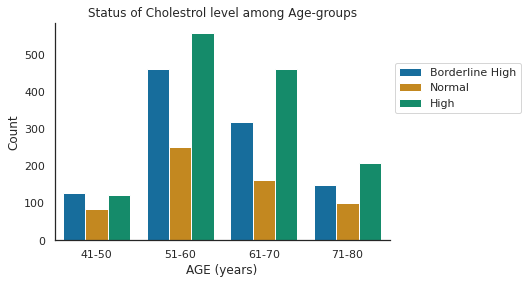

In [256]:
sns.set_style("white")
sns.set_context("notebook")
Figure1=sns.countplot(data=df5, x='AGE_GROUPS', order= ['41-50', '51-60', '61-70', '71-80'], hue = 'STATUS_TOTCHOL', hue_order =['Borderline High','Normal', 'High'], palette= 'colorblind')
Figure1.legend(loc='center left', bbox_to_anchor=(1, 0.7))
Figure1.set(xlabel='AGE (years)', ylabel='Count')
plt.title('Status of Cholestrol level among Age-groups')
sns.despine()
plt.savefig("/content/figures/Figure1.pdf", bbox_inches='tight')

<font color = 'red'>Creating a bar plot to visualize the distribution of hypertension among age-groups </font>

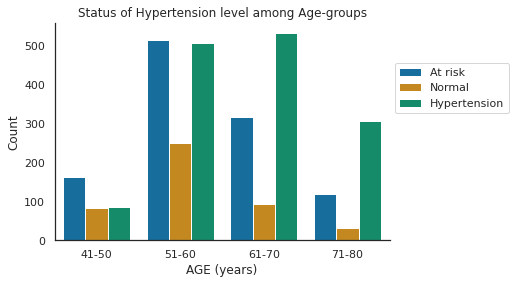

In [257]:
sns.set_style("white")
sns.set_context("notebook")
Figure2=sns.countplot(data=df5, x='AGE_GROUPS', order= ['41-50', '51-60', '61-70', '71-80'], hue = 'STATUS_HYPERTEN', hue_order =['At risk','Normal', 'Hypertension'], palette= 'colorblind')
Figure2.legend(loc='center left', bbox_to_anchor=(1, 0.7))
Figure2.set(xlabel='AGE (years)', ylabel='Count')
plt.title('Status of Hypertension level among Age-groups')
sns.despine()
plt.savefig("/content/figures/Figure2.pdf", bbox_inches='tight')

<font color = 'red'>Creating a line plot to visualize Total Cholestrol level distribution among Male and Female population of various age-groups </font>

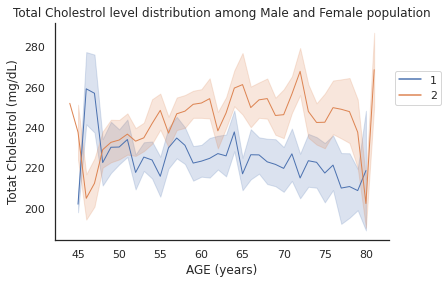

In [258]:
sns.set_style("white")
sns.set_context("notebook")
Figure3=sns.lineplot(data=df5, x='AGE', y='TOTCHOL', hue = 'SEX',lw =1,estimator = 'mean', palette= 'deep', markers= True, ci = 90)
Figure3.legend(loc='center left', bbox_to_anchor=(1, 0.7))
Figure3.set(xlabel='AGE (years)', ylabel='Totat Cholestrol (mg/dL)')
plt.title('Total Cholestrol level distribution among Male and Female population')
sns.despine()
plt.savefig("/content/figures/Figure3.pdf", bbox_inches='tight')

<font color = 'red'>Plot to determine Blood pressure and its correlation with Total Cholestrol</font>

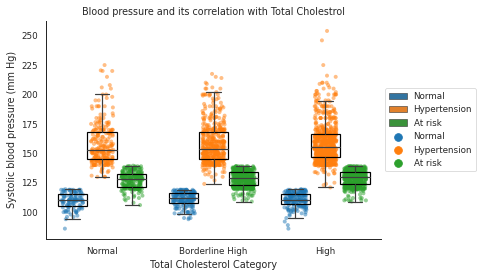

In [259]:
sns.set_style("white")
sns.set_context("paper")
x_order = ['Normal', 'Borderline High', 'High']
Figure4 = sns.boxplot(data=df5, x='STATUS_TOTCHOL', order = x_order, y='SYSBP', hue = 'STATUS_HYPERTEN', fliersize=0, boxprops={'edgecolor':'black', 'facecolor':(1,1,1,0)}, zorder=5)
Figure4 = sns.stripplot(data=df5, x='STATUS_TOTCHOL', y='SYSBP', order = x_order, hue = 'STATUS_HYPERTEN', dodge = True, jitter = 0.3, size = 4, zorder = 0, alpha = 0.5 )
Figure4.set(xlabel="Total Cholesterol Category", ylabel = "Systolic blood pressure (mm Hg)")
plt.title('Blood pressure and its correlation with Total Cholestrol', loc = 'center')
Figure4.legend (loc = 'center left', bbox_to_anchor = (1,0.5))
sns.despine()
plt.savefig("/content/figures/Figure4.pdf", bbox_inches='tight')

###**Statistical Analysis**

<font color ='yellow'>Statistical Analysis 1 </font>: Calculating Probability of patient getting Stroke in case of having pre-existing hypertension

In [260]:
# Creating a countmatrix to determine the relationship between Stroke and Hypertension
CountMatrix= pd.crosstab(df5['STROKE'], df5['HYPERTEN'], margins=True)
CountMatrix

HYPERTEN,0,1,All
STROKE,,,
0,723,2022,2745
1,21,235,256
All,744,2257,3001


In [261]:
ProbabilityMatrix = CountMatrix.copy()

In [262]:
# Calculating probability by creating a probability matrix for stroke and hypertension
def CalculateProbability(CountMatrix):

  TotalNumberofPatients= ProbabilityMatrix.iloc[len(ProbabilityMatrix.index) - 1,len(ProbabilityMatrix) - 1]
  #Creating for loop to convert CountMatrix to Probability Matrix
  for i in range(len(CountMatrix.index)):
      for j in range(len(CountMatrix)):
        ProbabilityMatrix.iloc[i,j] = CountMatrix.iloc[i,j] / TotalNumberofPatients

  return ProbabilityMatrix

CalculateProbability(ProbabilityMatrix)

HYPERTEN,0,1,All
STROKE,,,
0,0.240920,0.673775,0.914695
1,0.006998,0.078307,0.085305
All,0.247917,0.752083,1.000000


In [263]:
#Probability_Of_Stroke given history of Hypertension 
Probaility_of_Stroke= CountMatrix.iloc[1,1] / CountMatrix.iloc[1,2]
print("Probaility_of_Stroke of having stroke given history of Hypertension is:" , Probaility_of_Stroke)

Probaility_of_Stroke of having stroke given history of Hypertension is: 0.91796875


In [264]:
# Saving the results
ProbabilityMatrix.to_csv('/content/results/ProbabilityMatrix.csv')

In [265]:
df6 = df5.copy()

In [266]:
# Creating a new column to calculate the number of patients who are at risk of having borderline high or high total cholesterol level in one group and the other having normal levels
df6.loc[(df6['STATUS_TOTCHOL'] == 'High') | (df6['STATUS_TOTCHOL'] == 'Borderline High') , 'RISK'] = 1 
df6.loc[(df6['STATUS_TOTCHOL'] == 'Normal'), 'RISK'] = 0
df6

,SEX,PERIOD,AGE,SYSBP,DIABP,BPMEDS,CURSMOKE,CIGPDAY,TOTCHOL,HDLC,...,PREVHYP,STROKE,HYPERTEN,TIMESTRK,TIMEHYP,AGE_GROUPS,STATUS_TOTCHOL,CHOLESTROL_RATIO,STATUS_HYPERTEN,RISK
4,2,3,58,108.0,66.0,0.0,0,0.0,237.0,54.0,...,0,0,0,8766,8766,51-60,Borderline High,4.388889,Normal,1.0
14,2,3,55,180.0,106.0,1.0,0,0.0,220.0,46.0,...,1,0,1,8766,0,51-60,Borderline High,4.782609,Hypertension,1.0
19,2,3,57,110.0,46.0,0.0,1,30.0,320.0,34.0,...,0,0,1,8766,8679,51-60,High,9.411765,Normal,1.0
22,1,3,64,168.0,100.0,0.0,0,0.0,280.0,44.0,...,1,0,1,8766,0,61-70,High,6.363636,Hypertension,1.0
25,1,3,55,173.0,123.0,1.0,0,0.0,211.0,48.0,...,1,0,1,8766,0,51-60,Borderline High,4.395833,Hypertension,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11603,2,3,68,110.0,66.0,0.0,0,0.0,243.0,65.0,...,1,0,1,8766,0,61-70,High,3.738462,Normal,1.0
11606,1,3,70,163.5,75.0,0.0,0,0.0,219.0,50.0,...,1,1,1,8346,0,61-70,Borderline High,4.380000,Hypertension,1.0
11615,2,3,60,205.0,100.0,0.0,1,20.0,228.0,47.0,...,1,0,1,6433,2219,51-60,Borderline High,4.851064,Hypertension,1.0
11618,2,3,56,145.0,92.0,1.0,1,35.0,251.0,70.0,...,1,0,1,6729,4396,51-60,High,3.585714,Hypertension,1.0


In [267]:
# Creating a countmatrix to determine the relationship between Stroke and High and Borderline Cholestrol
CountMatrix1= pd.crosstab(df6['RISK'], df6['STROKE'], margins=True)
CountMatrix1

STROKE,0,1,All
RISK,,,
0.0,542,55,597
1.0,2203,201,2404
All,2745,256,3001


In [268]:
ProbabilityMatrix1=CountMatrix1.copy()

In [269]:
# Calculating probability matrix to determine probability between stroke and cholesterol
def CalculateProbability(CountMatrix1):

  TotalNumberofPatients= ProbabilityMatrix1.iloc[len(ProbabilityMatrix1.index) - 1,len(ProbabilityMatrix1) - 1]
  #Creating for loop to convert CountMatrix to Probability Matrix
  for i in range(len(CountMatrix1.index)):
      for j in range(len(CountMatrix1)):
        ProbabilityMatrix1.iloc[i,j] = CountMatrix1.iloc[i,j] / TotalNumberofPatients

  return ProbabilityMatrix1

CalculateProbability(ProbabilityMatrix1)

STROKE,0,1,All
RISK,,,
0.0,0.180606,0.018327,0.198934
1.0,0.734089,0.066978,0.801066
All,0.914695,0.085305,1.000000


In [270]:
CalculateProbability(ProbabilityMatrix1)

STROKE,0,1,All
RISK,,,
0.0,0.180606,0.018327,0.198934
1.0,0.734089,0.066978,0.801066
All,0.914695,0.085305,1.000000


In [271]:
#Probability_Of_Stroke given history of High Cholestrol / Borderline Cholestrol
Probaility_of_Stroke_Cholesterol= ProbabilityMatrix1.iloc[1,1] / ProbabilityMatrix1.iloc[1,2]
print("Probaility_of_Stroke of having stroke given history of High Cholestrol is:" , Probaility_of_Stroke_Cholesterol)

Probaility_of_Stroke of having stroke given history of High Cholestrol is: 0.08361064891846921


In [272]:
ProbabilityMatrix1.to_csv('/content/results/ProbabilityMatrix1.csv')

<font color = 'yellow'> Statistical Analysis 2 </font>: Hypothesis testing

Statistical Analysis 2a: Considering the Framingham Heart Study, whether Female participants have greater Cholestrol ratio than those of male participants

In [273]:
Malepopulation = df5.loc[df5['SEX'] == 1]
Femalepopulation = df5.loc[df5['SEX'] == 2]
print(len(Malepopulation))
print(len(Femalepopulation))

1291
1710


Null Hypothesis: H0 : M1 = M2 

Alternate Hypothesis: M1 < M2

where M1 = median cholestrol ratio in male participants

M2 = median cholestrol ratio in female participants

In [274]:
#Kolmogorov-Smirnov's Test for Normality
stats.kstest(Malepopulation['CHOLESTROL_RATIO'], 'norm')

KstestResult(statistic=0.986155116362947, pvalue=0.0)

In [275]:
#Kolmogorov-Smirnov's Test for Normality
stats.kstest(Femalepopulation['CHOLESTROL_RATIO'], 'norm')

KstestResult(statistic=0.9807199420616792, pvalue=0.0)

In [276]:
# Mann Whitney U test
stats.mannwhitneyu(Malepopulation['CHOLESTROL_RATIO'], Femalepopulation['CHOLESTROL_RATIO'])

MannwhitneyuResult(statistic=1344912.5, pvalue=1.0704493196151496e-24)

Conclusion: Since p < 0.05,  we reject the null hypothesis and hence there is statistically significant difference between the Cholestrol ratio experienced by Frahmingham Heart Study, where Female population have higher cholestrol ratio as compared to male

Statistical Analysis 2b 

Hypothesis in Question: Considering the Framingham Heart Study, whether participants older than 50 years of age have greater Cholestrol ratio than those of younger than 50 years of age

In [277]:
MorethanFifty = df5.loc[df5['AGE'] >= 50]
LessthanFifty = df5.loc[df5['AGE'] < 50]
print(len(MorethanFifty))
print(len(LessthanFifty))

2787
214


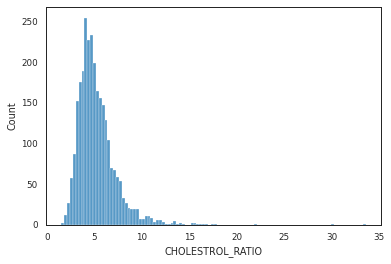

In [278]:
sns.histplot(MorethanFifty['CHOLESTROL_RATIO'])

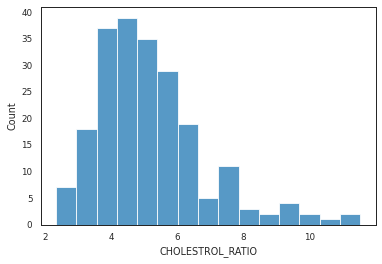

In [279]:
sns.histplot(LessthanFifty['CHOLESTROL_RATIO'])

In [280]:
# Null Hypothesis: H0 : M1 = M2 
# ALternate Hypothesis: M1 < M2
# where M1 = median cholestrol ratio in Less than 50 years of age patient
# M2 = median cholestrol ratio in more than 50 years of age patient

In [281]:
#Kolmogorov-Smirnov's Test for Normality
stats.kstest(MorethanFifty['CHOLESTROL_RATIO'], 'norm')

KstestResult(statistic=0.9818634530156402, pvalue=0.0)

In [282]:
#Kolmogorov-Smirnov's Test for Normality
stats.kstest(LessthanFifty['CHOLESTROL_RATIO'], 'norm')

KstestResult(statistic=0.990312477220914, pvalue=0.0)

The results of the Kolmogorov-Smirnov's Test for Normality suggests that the data is not normally distributed

In [283]:
# Mann-Whitney U Test
stats.mannwhitneyu(MorethanFifty['CHOLESTROL_RATIO'], LessthanFifty['CHOLESTROL_RATIO'])

MannwhitneyuResult(statistic=296515.0, pvalue=0.8897328511856475)

Conclusion: Since p > 0.05,  we fail to reject the null hypothesis and hence there is no statistically significant difference between the Cholestrol ratio experienced by Frahmingham Heart Study older than 50 years of age than those younger than 50 years of age

<font color = 'yellow'> Statistical Analysis 3 </font> : Correlation

Spearman's correlation to determine relationship between HDLC and systolic blood pressure

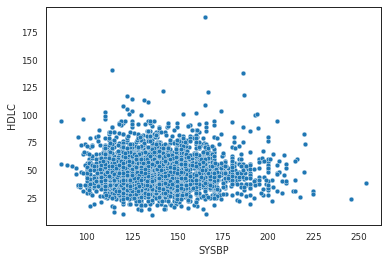

In [284]:
sns.scatterplot(data = df5, x = 'SYSBP', y= 'HDLC')

In [285]:
rho, p = stats.spearmanr(df5['SYSBP'], df5['HDLC'])
print(f"Spearman's correlation coefficient, rho : {rho:.5g}")
print(f"p-value: {p:.5g}")

Spearman's correlation coefficient, rho : -0.014194
p-value: 0.43699


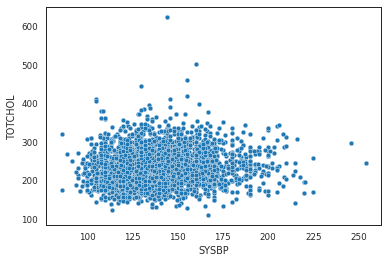

In [286]:
sns.scatterplot(data = df5, x = 'SYSBP', y= 'TOTCHOL')

In [287]:
rho1, p1 = stats.spearmanr(df5['SYSBP'], df5['TOTCHOL'])
print(f"Spearman's correlation coefficient, rho : {rho1:.5g}")
print(f"p-value: {p1:.5g}")

Spearman's correlation coefficient, rho : 0.1085
p-value: 2.5423e-09


###**Github repository**

In [288]:
%%bash
cat > .gitignore
.*
.gitignore

In [289]:
%%bash
git config --global user.email "pooja.vinod185@gmail.com"
git config --global user.name "pooja185"

In [290]:
%%bash
git init
ls -a

Reinitialized existing Git repository in /content/.git/
.
..
code
.config
figures
.git
.gitignore
README.md
results
startingData


In [291]:
%%bash
git add -A
git diff --name-only --cached

code/Project_Framingham_Heart.ipynb
figures/Figure1.pdf
figures/Figure2.pdf
figures/Figure3.pdf
figures/Figure4.pdf


In [292]:
%%bash
git commit -m "Amended project"

[main 27d7910] Amended project
 5 files changed, 477 insertions(+), 798 deletions(-)
 rewrite figures/Figure4.pdf (70%)


In [148]:
%%bash
ssh-keygen -t ed25519 -C 'pooja.vinod185@gmail.com' -f ~/.ssh/id_ed25519 -P ''
cat > ~/.ssh/config
Host *
  AddKeysToAgent yes
  IdentityFile ~/.ssh/id_ed25519

Generating public/private ed25519 key pair.
Created directory '/root/.ssh'.
Your identification has been saved in /root/.ssh/id_ed25519.
Your public key has been saved in /root/.ssh/id_ed25519.pub.
The key fingerprint is:
SHA256:HKW/37u9G8lFgcyw3YhAyNGM/lI5+nq8MdU9DGbvFgo pooja.vinod185@gmail.com
The key's randomart image is:
+--[ED25519 256]--+
|      ..Bo..+ .. |
|       + =. ++o .|
|      . o .o * ..|
|       o *  + =. |
|        S oE . *.|
|       o .... + =|
|        +o.  . * |
|         +o. ....|
|       .o.. . +=+|
+----[SHA256]-----+


In [149]:
%%bash
eval "$(ssh-agent -s)"
ssh-add ~/.ssh/id_ed25519

Agent pid 194


Identity added: /root/.ssh/id_ed25519 (pooja.vinod185@gmail.com)


In [150]:
%%bash
cat ~/.ssh/id_ed25519.pub

ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIN59DeBFmyEMHW5FVzWIJUXJ7cF5KTyyVh9PlnZgG55s pooja.vinod185@gmail.com


In [151]:
%%bash
ssh -o "StrictHostKeyChecking no" -T git@github.com | exit 0

Hi pooja185! You've successfully authenticated, but GitHub does not provide shell access.


In [293]:
%%bash
git remote add origin git@github.com:pooja185/Framingham_Heart_study_Project_Python.git
git branch -M main
git push -u origin main

Branch 'main' set up to track remote branch 'main' from 'origin'.


fatal: remote origin already exists.
To github.com:pooja185/Framingham_Heart_study_Project_Python.git
   8e832ca..27d7910  main -> main
